# 1. Journal Review (1)

<span class="girk">Learning Phrase Representations using RNN Encoder–Decoder by Kyunghyun Cho et al, University of Montreal</span>

## 1.1. Outline

- Seq2Seq 모델을 최초로 도입한 논문. 
  - 그 이후에는 Google의 "Sequence to Sequence with Neural Network"
- 여기서는 Sequence to sequence를 안스고 <span class="mark">"RNN Encoder-decoder"</span> 으로 표현되었음.
    - 1) RNN이 시퀀스를 고정된 길이의 벡터로 encoding
    - 2) 그 다음, 벡터 형태의 표현을 시퀀스로 decoding
        - <span class="mark">source sequence가 주어졌을때의 target seq의 조건부 확률을 최대화하게끔 "Jointly training"</span>

## 1.2. Introduction

- SMT (Statistical Machine Translation) 에서 인공신경망의 효과적인 결과들이 나오고 있음
- RNN encoder-decoder 제안, jointly training 시키고,
- 부가적으로 메모리 사용량과 학습을 쉽게해줄 몇가지 정교한 hidden unit에 대해서도 소개할 것
- Empirical evaluation :
    - English to french 번역, comparing its phrase scores

## 1.3. RNN Encoder-Decoder

### 1.3.1. 기존 RNN

- hidden state $h$
- optional output $y$
- Variable-length sequence $x = (x_1, ... , x_T)$

매번 step t에서, 히든 스테이트는 아래와 같이 업데이트 됨.

- <span class="mark">$h_t = f(h_{t-1}, x_t)$, where $f$ is non-linear activation function</span>
    - 여기서 $f$에 따라 여러가지가 있으며, 그 중 LSTM이 있다
- 여기서 시퀀스의 확률 분포를 RNN이 학습하게 되며,
- 아웃풋은 $p(x_t | x_{t-1}, ... ,x_1)$의 조건부 확률이다. 

### 1.3.2. RNN Encoder-Decoder

- 확률적 시각으로 본다면, 이 모델은 Variable-length sequence가 주어짐에 따라, 또다른 variable-length sequence의 조건부확률을 구하는 것
    - <span class="mark">$p(y_1, ..., y_{T'} | x_1, ..., x_T)$</span>
    - 여기서 $ T, T'$는 다른 시퀀스 길이를 말함.
![image](https://user-images.githubusercontent.com/48466625/63151432-76813880-c044-11e9-8207-f25660641450.png)

- Encoder는..
    - 하나의 RNN이며, 인풋 시퀀스의 각 symbol을 읽고, 읽으면서 히든 스테이트가 변하게 된다. 
    <span class="mark">$h_t = f(h_{t-1}, x_t)$</span>
    - 마지막까지 sequential하게 읽으면, RNN의 히든스테이트는 $c$로 축약되게 된다.
- Decoder는..
    - 히든스테이트 $h_t$가 주어졌을때, 다음 심볼인 $y_t$를 예측하는 아웃풋 시퀀스를 생성하게끔 학습된다.
    - 하지만, $y_t$와 $h_t$가 모두 $y_{t-1}$와 summary $c$에 컨디션드 되어있기 때문에, 디코더 히든스테이트는 아래와 같이 계산됨
    - <span class="mark">$h_t = f(h_{t-1}, y_{t-1}, c)$</span> = prior의 히든스테이트와 아웃풋, 임베딩된 $c$
- RNN이 위 두가지 요소를 jointly train --> conditional log-likelihood를 최대화하게끔.
![image](https://user-images.githubusercontent.com/48466625/63152404-b5b08900-c046-11e9-8d3d-387a717d0ea3.png)

모델 학습 후, 두가지 적용 방안, 

- input seq를 줄때 target seq를 생성하는 것
- <span class="mark">주어진 두개의 seq쌍 (인풋, 아웃풋 시퀀스)에 대해 $p(y|x)$를 이용해서 score를 매기는 용도</span>

### 1.3.3. Hidden Unit that adaptively remembers and forgets (GRU)

- 모델 아키텍처 뿐만 아니라, 새로운 형태의 hidden unit (motivated by LSTM, 더 간단한)을 제시.

![image](https://user-images.githubusercontent.com/48466625/63152945-07a5de80-c048-11e9-8924-61ada31a60c5.png)

- <span class="mark">Reset gate</span>
    - $x, h_{t-1}$은 각각 인풋과 이전 히든스테이트.
    - $W_r, U_r$은 학습해야할 weight matrix
![image](https://user-images.githubusercontent.com/48466625/63153026-43d93f00-c048-11e9-83a8-896cd27df202.png)

- <span class="mark">update gate</span>
![image](https://user-images.githubusercontent.com/48466625/63153044-55bae200-c048-11e9-862a-1513c62993e1.png)

- 이제 두 gate 값을 사용해서 Hidden unit $ h_j$ 값을 계산
    - reset gate가 0에 가까워지면 히든스테이트는 이전 히든값을 무시하게 된다. 현재 input으로만 reset됨.
    - update gate는 얼마나 많은 정보를 이전 히든에서 가져올 것인지를 결정하는데, LSTM의 memory cell과 유사하게 동작.

![image](https://user-images.githubusercontent.com/48466625/63153181-ad594d80-c048-11e9-9730-834c6e3347e7.png)

- <span class="mark">각각의 hidden unit은 reset gate / update gate를 가지며, dependency를 캡쳐할 수 있게끔 학습된다.</span>
    - reset gate가 좀더 자주 활성화가 된다면, short-term dependency.
    - update gate가 좀더 자주 활성화가 된다면, long-tem dependency.

## 1.4. Statistical Machine Translation

![image](https://user-images.githubusercontent.com/48466625/63153864-50f72d80-c04a-11e9-85ca-1c9d0540d654.png)

- 보통 SMT의 목적 : 소스 센텐스 $e$가 주어질때 translation function $f$를 찾는 것이다. (즉, 위 식을 최대화)
- 실제로는 대부분 아래 log식을 모델링한다.

![image](https://user-images.githubusercontent.com/48466625/63153992-96b3f600-c04a-11e9-99cc-745e2a24e509.png)

- $f_n, w_n$ : n번째 feature와 weights
- $Z(e)$ : weight랑 무관한 normalization 상수

# 2. Journal Review (2)

<span class="girk">Sequence to Sequence Learning with Neural Networks by Google</span>

## 2.1. Outline

- Sequence to sequence 사용한 최초 Neural machine translation 모델 
- 멀티레이어의 LSTM 사용, 인풋 시퀀스를 고정차원의 벡터로 맵핑 / 벡터로부터 타겟 시퀀스를 Decode

## 2.2. Introduction

- DNN의 한계는, 인풋과 타겟이 고정된 차원의 벡터로 민감하게 인코딩된다는 것인데,
    - 현실에서, 시퀀스의 길이가 a-priori로 주어지지 않는다. 
- 이 논문에서는 LSTM을 활용해서 시퀀스 to 시퀀스로 가는 구조를 소개한다.
![image](https://user-images.githubusercontent.com/48466625/63158877-2bbbec80-c055-11e9-86b5-3d2b3aa6b67b.png)

- <span class="mark">one LSTM이 인풋 시퀀스를 읽어 -> large fixed dimensional vector 얻어 -> another LSTM이 아웃풋 시퀀스를 벡터에서 뽑아냄</span>
- 아주 긴 시퀀스에 대해 잘 작동 (그래서 LSTM을 사용)
    - source sentence에서 order를 반대로 뒤집고, target에서는 그대로.
    - <span class="mark">__최적화 문제를 더 단순하게 만드는 short term dependencies 때문 (one of key contribution)__</span>
 


## 2.3. The model

- Vanila RNN으로도 시퀀스 to 시퀀스를 맵핑할 수 있지만, input/output 길이가 다르고 두 길이가 간단한 관계로 이루어지지 않은 경우 어려움
- LSTM의 목적 : 인풋 시퀀스에 대한 아웃풋 시퀀스의 조건부 확률을 구하는 것.
    - 인풋 시퀀스를 통해 고정된 길이의 vector representation $v$를 먼저 구하고,
    - 여기서 $v$는 첫 LSTM의 마지막 hidden state의 값이고,
    - 그리고 다시 LSTM을 통해 $y_1, ... , y_{T'}$의 확률을 계산한다.
![image](https://user-images.githubusercontent.com/48466625/63159618-e7315080-c056-11e9-8785-4a87eda785f1.png)

- 위 식에서 우항은 전체 vocab에서의 모든 words에 대한 softmax 값으로 구함.
- 실제 모델은 아래와 같이 사용.
    - 인풋과 아웃풋 시퀀스에 대해 서로 다른 두개의 LSTM을 사용
    - deep layer의 LSTM이 훨씬 성능이 높아서 4개 layer 사용
    - 인풋 시퀀스 순서 뒤집어서 사용
        - abc가 def로 번역이 되는데, 일부러 LSTM에게 cba가 def로 맵핑되게했음

## 2.4. Experiments

![image](https://user-images.githubusercontent.com/48466625/63160424-b18d6700-c058-11e9-9034-3b3274c657c7.png)

- 학습은 주어진 문장 S에 대한 정확히 번역된 문장 T의 log-확률값을 최대화하는 것. 
- $S$ : training set
- 학습이 끝난 후 주어진 문장에 대해서 가장 높은 확률을 갖는 문장을 찾는다.

![image](https://user-images.githubusercontent.com/48466625/63160592-18ab1b80-c059-11e9-97d4-8e9ef77f34a8.png)


![image](https://user-images.githubusercontent.com/48466625/63160669-4728f680-c059-11e9-80fe-11ad89ba053f.png)

- 인풋시퀀스에서 아웃풋시퀀스로 가는 <span class="mark">hidden state의 값인 fixed vector represenation을 PCA로 좌표상에 나타낸 결과.</span>
    - 문장 순서에 따라 값이 매우 달라지고, 능동/수동태는 별 연관이 없음

# 3. Tutorials1_NLP

- 시퀀스를입력받고, 시퀀스를 출력하는 모델 
- 챗봇이나, 번역 task

![image](https://user-images.githubusercontent.com/48466625/62620627-c715d900-b954-11e9-84ad-cf746caeb9d4.png)

- RNN 같은 것은 문장을 다 듣기도 전에, 답변을 만들기 때문에,,, 적절하지 않다.

## 3.1. Encoder-Decoder 구조

![image](https://user-images.githubusercontent.com/48466625/62620861-53c09700-b955-11e9-928e-f97762a0147a.png)

- <span class="mark">입력된 시퀀스를 Vector 형태로 압축 -> 압축된 벡터를 디코더에 전달 -> 디코더 부분 첫 hidden state 시작</span> 
- Yes 출력하고 그게 다시 인풋으로 들어가서, 히든스테이트와 함께 What's 출력 --> 이렇게 시퀀스를 출력
- 문장을 다 들은 후에 아웃풋 시퀀스를 출력한다**

## 3.2. Preprocess 및 보조 함수 

- 소스텍스트와 타겟텍스트를 train, test set으로 나누어서 학습 및 평가

In [32]:
import random
import torch
import torch.nn as nn
import torch.optim as optim

In [33]:
torch.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [34]:
raw = ["I feel hungry.	나는 배가 고프다.",
       "Pytorch is very easy.	파이토치는 매우 쉽다.",
       "Pytorch is a framework for deep learning.	파이토치는 딥러닝을 위한 프레임워크이다.",
       "Pytorch is very clear to use.	파이토치는 사용하기 매우 직관적이다."]

In [35]:
SOS_token = 0 # 디코더의 첫번째 step에서 인풋을 받기 위해서
EOS_token = 1 # 문장의 종료를 알려주는 토큰

In [53]:
# filter out the long sentence from source and target data
def filter_pair(pair, source_max_length, target_max_length):
    return len(pair[0].split(" ")) < source_max_length and len(pair[1].split(" ")) < target_max_length

# 영어 문장이 최대 단어 길이보다 작은지와,
# 한글 문장이 최대 단어 길이보다 작은지를 
# return

In [54]:
# class for vocabulary related information of data
class Vocab:
    def __init__(self):
        self.vocab2index = {"<SOS>": SOS_token, "<EOS>": EOS_token} # 초기 애들을 0, 1만들어주고
        self.index2vocab = {SOS_token: "<SOS>", EOS_token: "<EOS>"} # 반대로도 만들어주고
        self.vocab_count = {}
        self.n_vocab = len(self.vocab2index)

    def add_vocab(self, sentence):
        for word in sentence.split(" "): # 띄어쓰기로 구분한 단어들을 대상으로
            if word not in self.vocab2index:
                
                ## 각 단어를 순차적으로 1씩 올려서 딕셔너리로 만들어주기
                self.vocab2index[word] = self.n_vocab 
                self.vocab_count[word] = 1
                self.index2vocab[self.n_vocab] = word
                self.n_vocab += 1
            else:
                self.vocab_count[word] += 1

-----------

In [55]:
SOS_token = 0 # 디코더의 첫번째 step에서 인풋을 받기 위해서
EOS_token = 1 # 문장의 종료를 알려주는 토큰

In [57]:
vocab2index = {"<SOS>": SOS_token, "<EOS>": EOS_token}
print(vocab2index)

index2vocab = {SOS_token: "<SOS>", EOS_token: "<EOS>"}
print(index2vocab)

{'<SOS>': 0, '<EOS>': 1}
{0: '<SOS>', 1: '<EOS>'}


In [58]:
source_vocab = Vocab()
target_vocab = Vocab()

In [59]:
for pair in pairs:
    source_vocab.add_vocab(pair[0])
    target_vocab.add_vocab(pair[1])

In [60]:
source_vocab.vocab2index

{'<SOS>': 0,
 '<EOS>': 1,
 'i': 2,
 'feel': 3,
 'hungry.': 4,
 'pytorch': 5,
 'is': 6,
 'very': 7,
 'easy.': 8,
 'a': 9,
 'framework': 10,
 'for': 11,
 'deep': 12,
 'learning.': 13,
 'clear': 14,
 'to': 15,
 'use.': 16}

In [61]:
target_vocab.vocab2index

{'<SOS>': 0,
 '<EOS>': 1,
 '나는': 2,
 '배가': 3,
 '고프다.': 4,
 '파이토치는': 5,
 '매우': 6,
 '쉽다.': 7,
 '딥러닝을': 8,
 '위한': 9,
 '프레임워크이다.': 10,
 '사용하기': 11,
 '직관적이다.': 12}

--------------

In [38]:
# 소스텍스트와 타겟텍스트를 나눠서, 어떤 단어로 구성되어있고 이런것들을 측정하는.

def preprocess(corpus, source_max_length, target_max_length):
    print("reading corpus...")
    pairs = []
    for line in corpus:
        pairs.append([s for s in line.strip().lower().split("\t")]) 
        #문장을 양쪽여백 없애고 / 소문자로 바꾸고 / tab으로 구분해서 나눠서,
    print("Read {} sentence pairs".format(len(pairs)))

    pairs = [pair for pair in pairs if filter_pair(pair, source_max_length, target_max_length)]
    print("Trimmed to {} sentence pairs".format(len(pairs)))
    
    # Vocab이라는 클래스를 선언해서, 클래스 안에다가 단어의 갯수나 단어의 딕셔너리를 만들어서 넣어주기 
    source_vocab = Vocab()
    target_vocab = Vocab()
          
    print("Counting words...")
    for pair in pairs:
          source_vocab.add_vocab(pair[0])
          target_vocab.add_vocab(pair[1])
          
    print("source vocab size =", source_vocab.n_vocab)
    print("target vocab size =", target_vocab.n_vocab)
          
    return pairs, source_vocab, target_vocab

![image](https://user-images.githubusercontent.com/48466625/63208335-b52ef580-c10d-11e9-8cc0-b088679e707d.png)

In [39]:
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size) 
        
        # input_size : 소스 텍스트 내 말뭉치(corpus)에서 사용되고 있는 단어의 갯수.
        # 100개의 단어가 사용되고 있으면, 100개의 차원을 가지는 원핫 인코디드 벡터 
        # hidden_size : 히든사이즈 만큼의 벡터로 줄여서 표현하는.
        # 즉, 100개 차원의 원핫인코디드 벡터와 Embedding이 곱해져서 hidden_size 차원을 만들어내서 그게 GRU로 들어간다.
        
        self.gru = nn.GRU(hidden_size, hidden_size)
    
    def forward(self, x, hidden):
        x = self.embedding(x).view(1, 1, -1) # 인풋된 x가 임베딩 되고
        x, hidden = self.gru(x, hidden) # 임베딩된 x가 GRU로 들어가서 x, hidden이 나옴
        return x, hidden

![image](https://user-images.githubusercontent.com/48466625/63208321-a0526200-c10d-11e9-9a10-d45c8df8900b.png)

In [40]:
class Decoder(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(output_size, hidden_size) # 200개의 단어를 16차원으로 줄이는 
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size) # 다시 인풋으로 들어가야하니까 16차원으로 나온걸 200단어로 다시 늘리는 
        self.softmax = nn.LogSoftmax(dim=1)
        
        # GRU가 있다면,
        # 히든스테이트로는, Encoder의 마지막 최종 아웃풋이 들어오고,
        # 인풋은 원핫인코디드 벡터가 Embedding과 곱해져서 우리가 필요한 디멘젼만큼 줄어든 벡터가 되서 들어옴
        
    def forward(self, x, hidden):
        
        # 임베딩 통과하고 -> GRU 통과하고 -> out 통과후 -> softmax 통과하는 
        x = self.embedding(x).view(1, 1, -1)
        x, hidden = self.gru(x, hidden)
        x = self.softmax(self.out(x[0]))
        return x, hidden

In [41]:
# sentence를 입력으로 받아서, 원핫인코딩으로 바꾸고, 이를 Tensor로 바꾸는 
def tensorize(vocab, sentence):
    indexes = [vocab.vocab2index[word] for word in sentence.split(" ")]
    indexes.append(vocab.vocab2index["<EOS>"])
    return torch.Tensor(indexes).long().to(device).view(-1, 1)

In [42]:
# training seq2seq
def train(pairs, source_vocab, target_vocab, encoder, decoder, n_iter, print_every=1000, learning_rate=0.01):
    loss_total = 0

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    
    # 전체 데이터셋에서 필요한 갯수만큼 랜덤하게 추출하고, 소스텍스트와 타겟텍스트를 나누는.
    # 배치를 뽑는 과정 
    training_batch = [random.choice(pairs) for _ in range(n_iter)]
    training_source = [tensorize(source_vocab, pair[0]) for pair in training_batch]
    training_target = [tensorize(target_vocab, pair[1]) for pair in training_batch]

    criterion = nn.NLLLoss() # 카테고리 value 끼리의 비교를 위해

    for i in range(1, n_iter + 1):
        source_tensor = training_source[i - 1]
        target_tensor = training_target[i - 1]

        encoder_hidden = torch.zeros([1, 1, encoder.hidden_size]).to(device) 
        # 맨처음에 들어가는 히든스테이트 없으니 0 벡터로 만들어서 넣음

        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()

        source_length = source_tensor.size(0)
        target_length = target_tensor.size(0)

        loss = 0
        
        # 문장이 다 끝날때까지, 인코더에 넣어서 히든스테이트를 꺼내오게 됨
        for enc_input in range(source_length):
            _, encoder_hidden = encoder(source_tensor[enc_input], encoder_hidden)

        decoder_input = torch.Tensor([[SOS_token]]).long().to(device) 
        ####### 디코더에서 맨처음에 들어가는 인풋값
        decoder_hidden = encoder_hidden 
        ####################### 디코더에서 맨처음에 들어가는 히든값 = 인코더에서의 마지막 히든값

        for di in range(target_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  
            # teacher forcing
            ### GRU 예측값이 다음 입력으로 들어갈 수도 있지만 그렇게 안하고,
            ### 직접 정답을 인풋으로 넣어주는 것을 teacher forcing. 좀더 빨리 수렴시킬 수 있지만, 네트워크 학습이 좀 불안해질 수도. 
            ### 50% 확률로 teacher forcing을 하고 나머지는 예측값이 들어가고 이렇게 할 수도 있음.

        loss.backward()

        encoder_optimizer.step()
        decoder_optimizer.step()

        loss_iter = loss.item() / target_length
        loss_total += loss_iter

        if i % print_every == 0:
            loss_avg = loss_total / print_every
            loss_total = 0
            print("[{} - {}%] loss = {:05.4f}".format(i, i / n_iter * 100, loss_avg))

In [49]:
# insert given sentence to check the training
def evaluate(pairs, source_vocab, target_vocab, encoder, decoder, target_max_length):
    for pair in pairs:
        print("[eng]", pair[0])
        print("[kor]", pair[1])
        source_tensor = tensorize(source_vocab, pair[0])
        source_length = source_tensor.size()[0]
        encoder_hidden = torch.zeros([1, 1, encoder.hidden_size]).to(device)

        for ei in range(source_length):
            _, encoder_hidden = encoder(source_tensor[ei], encoder_hidden)

        decoder_input = torch.Tensor([[SOS_token]], device=device).long()
        decoder_hidden = encoder_hidden
        decoded_words = []

        for di in range(target_max_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            _, top_index = decoder_output.data.topk(1)
            if top_index.item() == EOS_token:
                decoded_words.append("<EOS>")
                break
            else:
                decoded_words.append(target_vocab.index2vocab[top_index.item()])

            decoder_input = top_index.squeeze().detach()

        predict_words = decoded_words
        predict_sentence = " ".join(predict_words)
        print("[predict]", predict_sentence)
        print("")

## 3.3. Train & Evaluate

In [44]:
# declare max length for sentence
SOURCE_MAX_LENGTH = 10
TARGET_MAX_LENGTH = 12

In [45]:
# preprocess the corpus
load_pairs, load_source_vocab, load_target_vocab = preprocess(raw, SOURCE_MAX_LENGTH, TARGET_MAX_LENGTH)
print(random.choice(load_pairs))

reading corpus...
Read 4 sentence pairs
Trimmed to 4 sentence pairs
Counting words...
source vocab size = 17
target vocab size = 13
['pytorch is very easy.', '파이토치는 매우 쉽다.']


In [47]:
# declare the encoder and the decoder
enc_hidden_size = 16
dec_hidden_size = enc_hidden_size
enc = Encoder(load_source_vocab.n_vocab, enc_hidden_size).to(device)
dec = Decoder(dec_hidden_size, load_target_vocab.n_vocab).to(device)

In [51]:
# train seq2seq model
train(load_pairs, load_source_vocab, load_target_vocab, enc, dec, 5000, print_every=1000)

[1000 - 20.0%] loss = 0.7375
[2000 - 40.0%] loss = 0.1081
[3000 - 60.0%] loss = 0.0333
[4000 - 80.0%] loss = 0.0181
[5000 - 100.0%] loss = 0.0125


In [52]:
# check the model with given data
evaluate(load_pairs, load_source_vocab, load_target_vocab, enc, dec, TARGET_MAX_LENGTH)

[eng] i feel hungry.
[kor] 나는 배가 고프다.
[predict] 나는 배가 고프다. <EOS>

[eng] pytorch is very easy.
[kor] 파이토치는 매우 쉽다.
[predict] 파이토치는 매우 쉽다. <EOS>

[eng] pytorch is a framework for deep learning.
[kor] 파이토치는 딥러닝을 위한 프레임워크이다.
[predict] 파이토치는 딥러닝을 위한 프레임워크이다. <EOS>

[eng] pytorch is very clear to use.
[kor] 파이토치는 사용하기 매우 직관적이다.
[predict] 파이토치는 사용하기 매우 직관적이다. <EOS>



# 4. Tutorials2_signal prediction

## 4.1. Data generation

- tuple of (signal_1,signal_2)
    - signal_1 : 사인과 코사인 (0 ~ 1.5pi)
    - signal_2 : 사인과 코사인 (1.5pi ~ 3.0pi)
    - with random offset
- 차원 : (batch_size, seq_length, output_dim)
    - 시퀀스 길이 : 10 / 예측값 : 2개의 예시

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch

In [2]:
def generate_data(isTrain, batch_size):

    seq_length = 10

    batch_x = []
    batch_y = []
    for _ in range(batch_size):
        rand = np.random.random() * 2 * np.pi

        sig1 = np.sin(np.linspace(0.0 * np.pi + rand, 3.0 * np.pi + rand, seq_length * 2)) # 20개 포인트
        sig2 = np.cos(np.linspace(0.0 * np.pi + rand, 3.0 * np.pi + rand, seq_length * 2)) # 20개 포인트
        x1 = sig1[:seq_length] # 앞 10개
        y1 = sig1[seq_length:] # 뒤 10개
        x2 = sig2[:seq_length] # 앞 10개
        y2 = sig2[seq_length:] # 뒤 10개

        x_ = np.array([x1, x2])
        y_ = np.array([y1, y2])
        x_, y_ = x_.T, y_.T

        batch_x.append(x_)
        batch_y.append(y_)

    batch_x = np.array(batch_x)
    batch_y = np.array(batch_y)
    # shape: (batch_size, seq_length, output_dim)

    batch_x = np.array(batch_x).transpose((1, 0, 2))
    batch_y = np.array(batch_y).transpose((1, 0, 2))
    # shape: (seq_length, batch_size, output_dim)

    return batch_x, batch_y

In [3]:
sample_x, sample_y = generate_data(isTrain=True, batch_size=5)
print("Dimensions of the dataset for 3 X and 3 Y training examples : ")
print(sample_x.shape)
print(sample_y.shape)
print("(길이는10, 배치사이즈는 5, 예측은 2)")

Dimensions of the dataset for 3 X and 3 Y training examples : 
(10, 5, 2)
(10, 5, 2)
(길이는10, 배치사이즈는 5, 예측은 2)


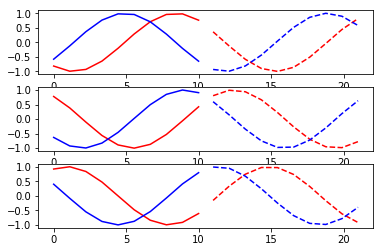

In [4]:
plt.figure()
x_axis = np.linspace(0, 10, 10)
for i in range(3):
    plt.subplot(311+i)
    plt.yticks(np.linspace(-1,1,5))
    plt.plot(x_axis, sample_x[:, i, 0], 'r', x_axis, sample_x[:, i, 1], 'b')
    plt.plot(x_axis+11, sample_y[:, i, 0], 'r--', x_axis+11, sample_y[:, i, 1], 'b--')

plt.show()

## 4.2. seq2seq model 

In [5]:
class Encoder(nn.Module):
    def __init__(self,
                 input_size,
                 hidden_size,
                 number_of_layers=1,
                 dropout=0,
                 bidirectional=False):
        super(Encoder, self).__init__()
        self.encoder = nn.LSTM(input_size,
                               hidden_size,
                               num_layers=number_of_layers,
                               dropout=dropout,
                               bidirectional=bidirectional)

    def forward(self, x, hidden):
        encoder_output, encoder_state = self.encoder(x, hidden)
        return encoder_output, encoder_state

In [6]:
class Decoder(nn.Module):
    def __init__(self,
                 input_size,
                 hidden_size,
                 output_size,
                 number_of_layers=1,
                 dropout=0,
                 bidirectional=False):
        super(Decoder, self).__init__()
        self.decoder = nn.LSTM(input_size,
                               hidden_size,
                               num_layers=number_of_layers,
                               dropout=dropout,
                               bidirectional=bidirectional)
        self.linear = nn.Linear(hidden_size, output_size)
        
    def forward(self, x, hidden):
        decoder_output, next_hidden = self.decoder(x, hidden)
        outputs = []
        for i in range(decoder_output.size()[1]):
            outputs += [self.linear(decoder_output[:, i, :])]
        return torch.stack(outputs, dim=1).squeeze(), decoder_output, next_hidden

In [7]:
class Model(nn.Module):
    def __init__(self, 
                 input_size,
                 hidden_size,
                 output_size,
                 number_of_layers=1,
                 output_length=10):
        super(Model, self).__init__()
        self.encoder = Encoder(input_size, hidden_size, number_of_layers=number_of_layers)
        self.decoder = Decoder(hidden_size, hidden_size, output_size, number_of_layers=number_of_layers)
        self.output_length = output_length
        self.number_of_layers = number_of_layers
        self.hidden_size = hidden_size
        
    def forward(self, x):
        encoder_output, encoder_state = self.encoder(x, None)
        decoder_input = torch.unsqueeze(encoder_output[-1], 0)
        
        seq = []
        next_hidden=None
        next_input = decoder_input
        for _ in range(self.output_length):
            output, next_input, next_hidden = self.decoder(next_input, next_hidden)
            seq += [output]
        return torch.stack(seq, dim=0).squeeze()

In [8]:
input_dim = output_dim = 2
hidden_dim = 12

In [9]:
model = Model(2, hidden_dim, output_dim)
print(model)

Model(
  (encoder): Encoder(
    (encoder): LSTM(2, 12)
  )
  (decoder): Decoder(
    (decoder): LSTM(12, 12)
    (linear): Linear(in_features=12, out_features=2, bias=True)
  )
)


## 4.3. Train

In [11]:
learning_rate = 0.007 
loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
batch_size = 5
n_iter = 1000

step: 0 , loss: 0.52007884


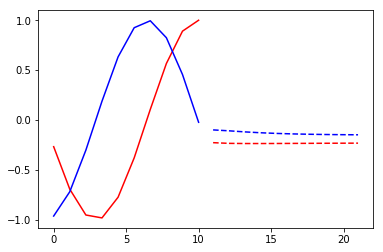

step: 200 , loss: 0.0008097331


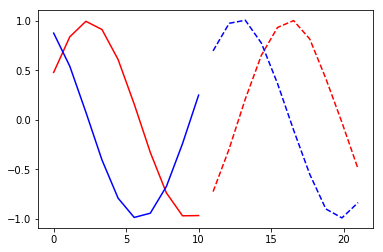

step: 400 , loss: 0.0001354316


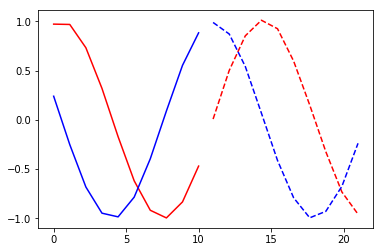

step: 600 , loss: 0.00018575466


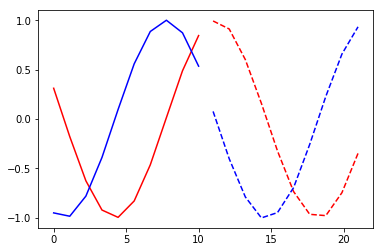

step: 800 , loss: 0.00016800042


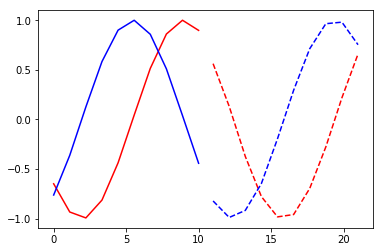

In [14]:
for step in range(n_iter):
    temp_x, temp_y = generate_data(isTrain=True, batch_size=batch_size)
    x = autograd.Variable(torch.FloatTensor(temp_x), requires_grad=False)
    y = autograd.Variable(torch.FloatTensor(temp_y), requires_grad=False)
    optimizer.zero_grad()
    prediction = model(x)   # rnn output
    loss = loss_func(prediction, y)
    
    x_axis = np.linspace(0, 10, 10)
    target_x = x_axis+11

    if step % 200 == 0:
        print('step:', step, ', loss:', loss.data.numpy())
        plot_y = prediction.data.numpy()
        plt.figure()
        plt.yticks(np.linspace(-1,1,5))
        plt.plot(x_axis, temp_x[:, i, 0], 'r', x_axis, temp_x[:, i, 1], 'b')
        plt.plot(target_x, plot_y[:, i, 0], 'r--', x_axis+11, plot_y[:, i, 1], 'b--')
        plt.show()
    loss.backward()
    optimizer.step()

## 4.4. Evaluate

In [15]:
temp_x, temp_y = generate_data(isTrain=False, batch_size=1)
x = autograd.Variable(torch.FloatTensor(temp_x), requires_grad=False)
y = autograd.Variable(torch.FloatTensor(temp_y), requires_grad=False)
prediction = model(x)
prediction = prediction.data.numpy()
print(temp_x.shape)
print(prediction.shape)

(10, 1, 2)
(10, 2)


Display prediction after training.


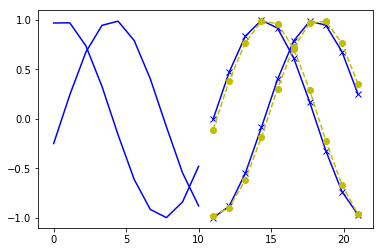

In [16]:
print('Display prediction after training.')
plt.figure()
x_axis = np.linspace(0, 10, 10)
plt.yticks(np.linspace(-1,1,5))
plt.plot(x_axis, temp_x[:, 0, 0], 'b', x_axis, temp_x[:, 0, 1], 'b')
target_x = x_axis+11

plt.plot(target_x, temp_y[:, 0, 0], 'bx-', target_x, temp_y[:, 0, 1], 'bx-')
plt.plot(target_x, prediction[:, 0], 'yo--', target_x, prediction[:, 1], 'yo--')
plt.show()